# Collatz Conjecture

3n + 1 problem

Counterexample
* Cycle That Does Not Contain One
* Increase Without Bound

K-Cycle
* Can be partitioned into 2k subsequences of same direction
* k refers to the number of switches in ascending/descending order
* Strictly increasing then deceasing is a 1-cycle
* Increase, decrease, increase, decrease is a 2-cycle
* It has been proven that there is no k-cycle below or equal to k-68
* k-68 proof also gives upper bound on size of smallest element in cycles above k-68
* Verification of conjecture up to 2^68 along with ^ implies there are no cycles below k-77

Backwards Approach - prove that 1 leads to all positive numbers using inverse conjecture

Binary Machine
* Append 1 to the right (results in 2n + 1)
* Add original number resulting in (3n + 1)
* Remove trailing zeros to divide by 2 until odd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
memoization_set = set()

In [3]:
def reset():
    memoization_set = set()

In [4]:
def basic_collatz(n):
    return n / 2 if (n % 2) == 0 else (3*n + 1)

In [5]:
def short_collatz(n):
    return n / 2 if (n % 2) == 0 else ((3*n + 1)/2)

In [6]:
def short_collatz_2(n):
    return n / 2 if (n % 2) == 0 else (1.5*n + 0.5)

In [7]:
def bitwise_collatz(n):
    if n % 2 == 0:
        return 1
    threenplus1 = (((n << 1) | 0b1) + n)
    return threenplus1 >> int.bit_length(((threenplus1 - 1) ^ threenplus1) >> 1)
    

In [8]:
def apply_collatz(start_number, fun, use_memo=False):
    steps = 0
    working_number = start_number
    while working_number != 1 and not (use_memo and working_number in memoization_set):
        working_number = fun(working_number)
        steps += 1
    memoization_set.add(start_number)
    return steps

## Benchmark

### Non Memo

In [9]:
start_numbers = [int(x) for x in np.arange(1, 1000001)]

In [10]:
st = time.time()
r = [apply_collatz(x, basic_collatz)for x in start_numbers]
basic_time = time.time() - st
print(basic_time, "s")

27.054404735565186 s


In [11]:
st = time.time()
r = [apply_collatz(x, short_collatz) for x in start_numbers]
short_time = time.time() - st
print(short_time, "s")

19.594148635864258 s


In [12]:
st = time.time()
r = [apply_collatz(x, short_collatz_2) for x in start_numbers]
short_2_time = time.time() - st
print(short_2_time, "s")

17.297462463378906 s


In [13]:
st = time.time()
r = [apply_collatz(x, bitwise_collatz) for x in start_numbers]
bitwise_time = time.time() - st
print(bitwise_time, "s")

7.964312314987183 s


### Memo

In [14]:
reset()
st = time.time()
r = [apply_collatz(x, basic_collatz, use_memo=True)for x in start_numbers]
basic_time_mem = time.time() - st
print(basic_time_mem, "s")

0.2223982810974121 s


In [15]:
reset()
st = time.time()
r = [apply_collatz(x, short_collatz, use_memo=True) for x in start_numbers]
short_time_memo = time.time() - st
print(short_time_memo, "s")

0.22131943702697754 s


In [16]:
reset()
st = time.time()
r = [apply_collatz(x, short_collatz_2, use_memo=True) for x in start_numbers]
short_2_time_memo = time.time() - st
print(short_2_time_memo, "s")

0.2232975959777832 s


In [21]:
reset()
st = time.time()
r = [apply_collatz(x, bitwise_collatz, use_memo=True) for x in start_numbers]
bitwise_memo = time.time() - st
print(bitwise_memo, "s")

0.22229433059692383 s


In [18]:
all_times = [basic_time, short_time, short_2_time, bitwise_time, 
             basic_time_mem, short_time_memo, short_2_time_memo, bitwise_memo]

## Plot Results

In [19]:
def labeled_bar(values, labels, title="", ylabel=""):
    values = np.array(values)
    fig, ax = plt.subplots()
    ax.bar(np.arange(len(labels)), values, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_title(title)
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.show()

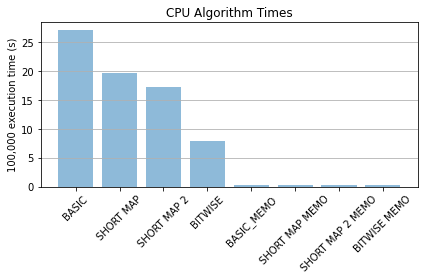

[27.054404735565186, 19.594148635864258, 17.297462463378906, 7.964312314987183, 0.2223982810974121, 0.22131943702697754, 0.2232975959777832, 0.22508549690246582]


In [20]:
title = "CPU Algorithm Times"
labels = ["BASIC", "SHORT MAP", "SHORT MAP 2", "BITWISE", "BASIC_MEMO", "SHORT MAP MEMO", "SHORT MAP 2 MEMO", "BITWISE MEMO"]
labeled_bar(all_times, labels, title=title, ylabel="100,000 execution time (s)")
print(all_times)